In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


plt.style.use("../assets/matplotlib_styles/pepso_light.mplstyle")


## Limit Switch

In [3]:
# Generate a signal
samplingFreq = 1000; # sampled at 1 kHz = 1000 samples / second
tlims = [0,1]        # in seconds
signalFreq = [2,50]; # Cycles / second
signalMag = [1,0.2]; # magnitude of each sine
t = np.linspace(tlims[0],tlims[1],(tlims[1]-tlims[0])*samplingFreq)
y = np.array([ np.where(i<0.5, 0, 5) for i in t], dtype='float32')

In [4]:
# Add some noise
N = 2
n = np.random.randn(*y.shape) * N
spikes = n.copy()
for i in range(len(n)):
    if np.random.rand() > 0.9:
        pass
    else:
        spikes[i] = 0
        
y_noisy = y + n

In [5]:
# Compute the Fourier transform
yhat = np.fft.fft(y);
fcycles = np.fft.fftfreq(len(t), d=1.0/samplingFreq); # the frequencies in cycles/s

yhat_noisy = np.fft.fft(y_noisy);
fcycles = np.fft.fftfreq(len(t), d=1.0/samplingFreq); # the frequencies in cycles/s

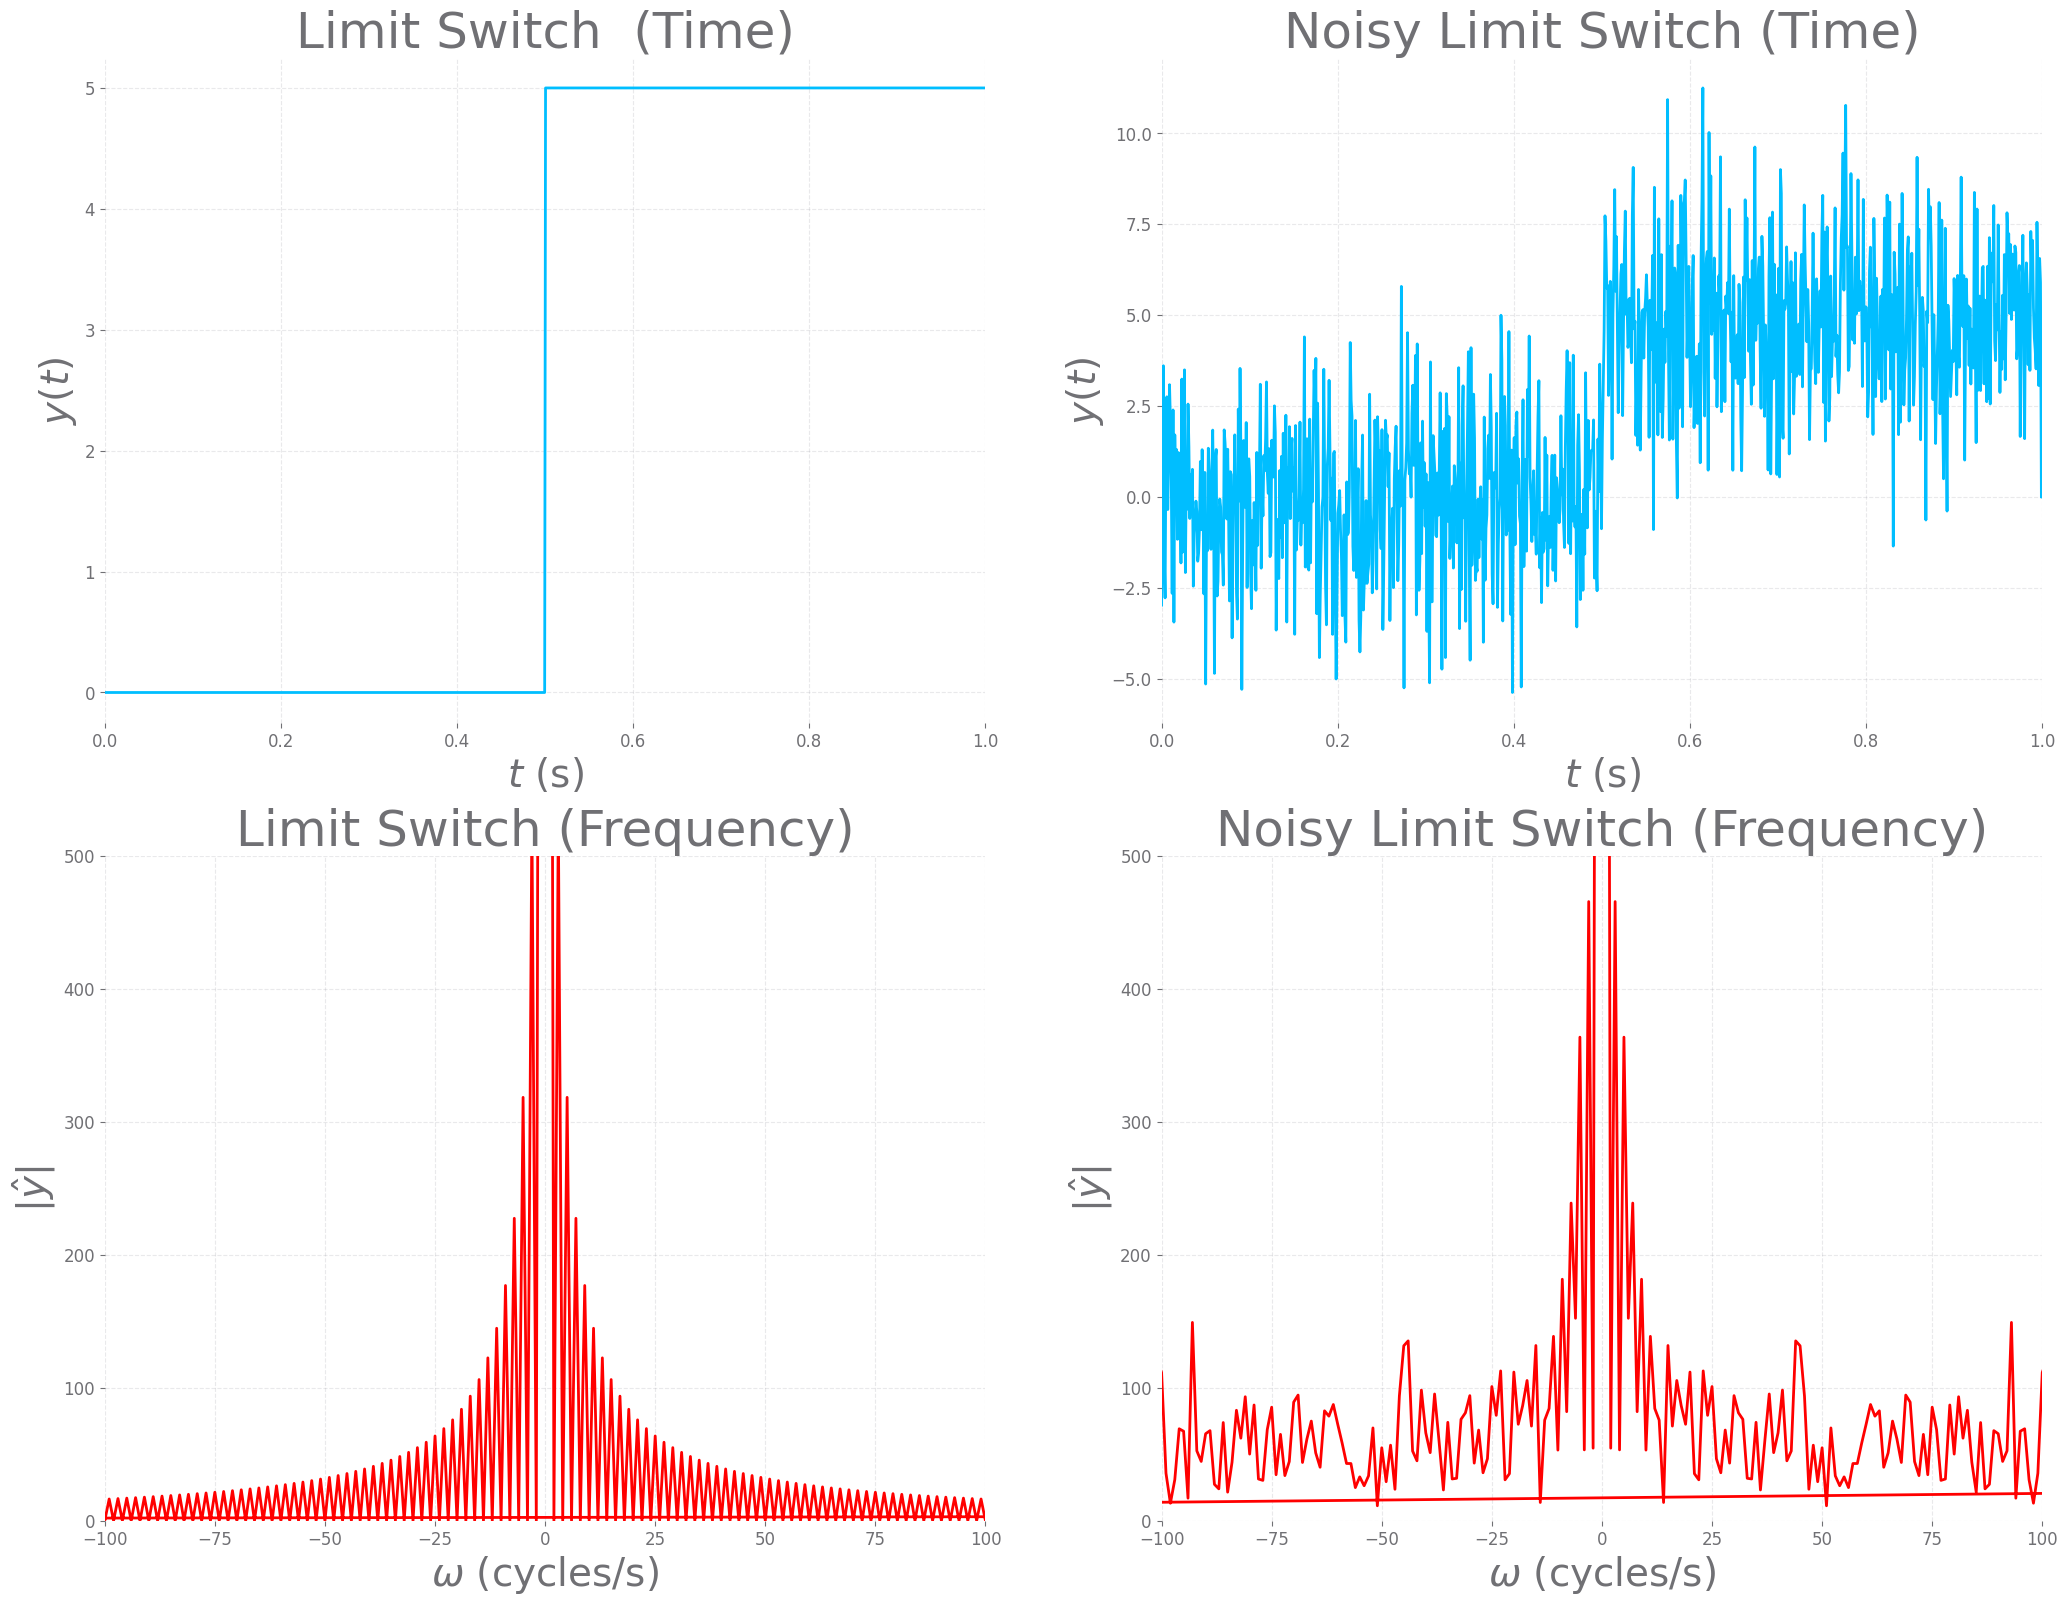

In [9]:
# Plot the signal
fig, ax = plt.subplots(2, 2, figsize=(25,19))


ax[0, 0].plot(t,y);
ax[0, 0].set_title("Limit Switch  (Time)", fontsize=36) 
ax[0, 0].set_ylabel("$y(t)$", fontsize=28);
ax[0, 0].set_xlabel("$t$ (s)", fontsize=28);
ax[0, 0].set_xlim([min(t),max(t)]);

# Plot the power spectrum
ax[1, 0].plot(fcycles,np.absolute(yhat), color='red');
ax[1, 0].set_title("Limit Switch (Frequency)", fontsize=36) 
ax[1, 0].set_xlim([-100,100]);
ax[1, 0].set_ylim([0,500]);
ax[1, 0].set_xlabel("$\omega$ (cycles/s)", fontsize=28);
ax[1, 0].set_ylabel("$|\hat{y}|$", fontsize=28);

ax[0, 1].plot(t,y_noisy);
ax[0, 1].set_title("Noisy Limit Switch (Time)", fontsize=36) 
ax[0, 1].set_ylabel("$y(t)$", fontsize=28);
ax[0, 1].set_xlabel("$t$ (s)", fontsize=28);
ax[0, 1].set_xlim([min(t),max(t)]);

# Plot the power spectrum
ax[1, 1].plot(fcycles,np.absolute(yhat_noisy), color='red');
ax[1, 1].set_title("Noisy Limit Switch (Frequency)", fontsize=36) 
ax[1, 1].set_xlim([-100,100]);
ax[1, 1].set_ylim([0,500]);
ax[1, 1].set_xlabel("$\omega$ (cycles/s)", fontsize=28);
ax[1, 1].set_ylabel("$|\hat{y}|$", fontsize=28);

fig.savefig("../assets/figs/limit_switch_signal.png")

In [10]:
# Generate a signal
samplingFreq = 1000; # sampled at 1 kHz = 1000 samples / second
tlims = [0,1]        # in seconds
signalFreq = [2,50]; # Cycles / second
signalMag = [1,0.2]; # magnitude of each sine
t = np.linspace(tlims[0],tlims[1],(tlims[1]-tlims[0])*samplingFreq)
y = signal.square(2 * np.pi * 5 * t)


In [11]:
# Add some noise
N = 5
n = np.random.rand(*y.shape) * 2
y_noisy = y + n


In [16]:
# Compute the Fourier transform
yhat = np.fft.fft(y);
fcycles = np.fft.fftfreq(len(t),d=1.0/samplingFreq); # the frequencies in cycles/s

# Compute the Fourier transform
yhat_noisy = np.fft.fft(y_noisy);
fcycles = np.fft.fftfreq(len(t),d=1.0/samplingFreq); # the frequencies in cycles/s

TypeError: 'module' object is not callable

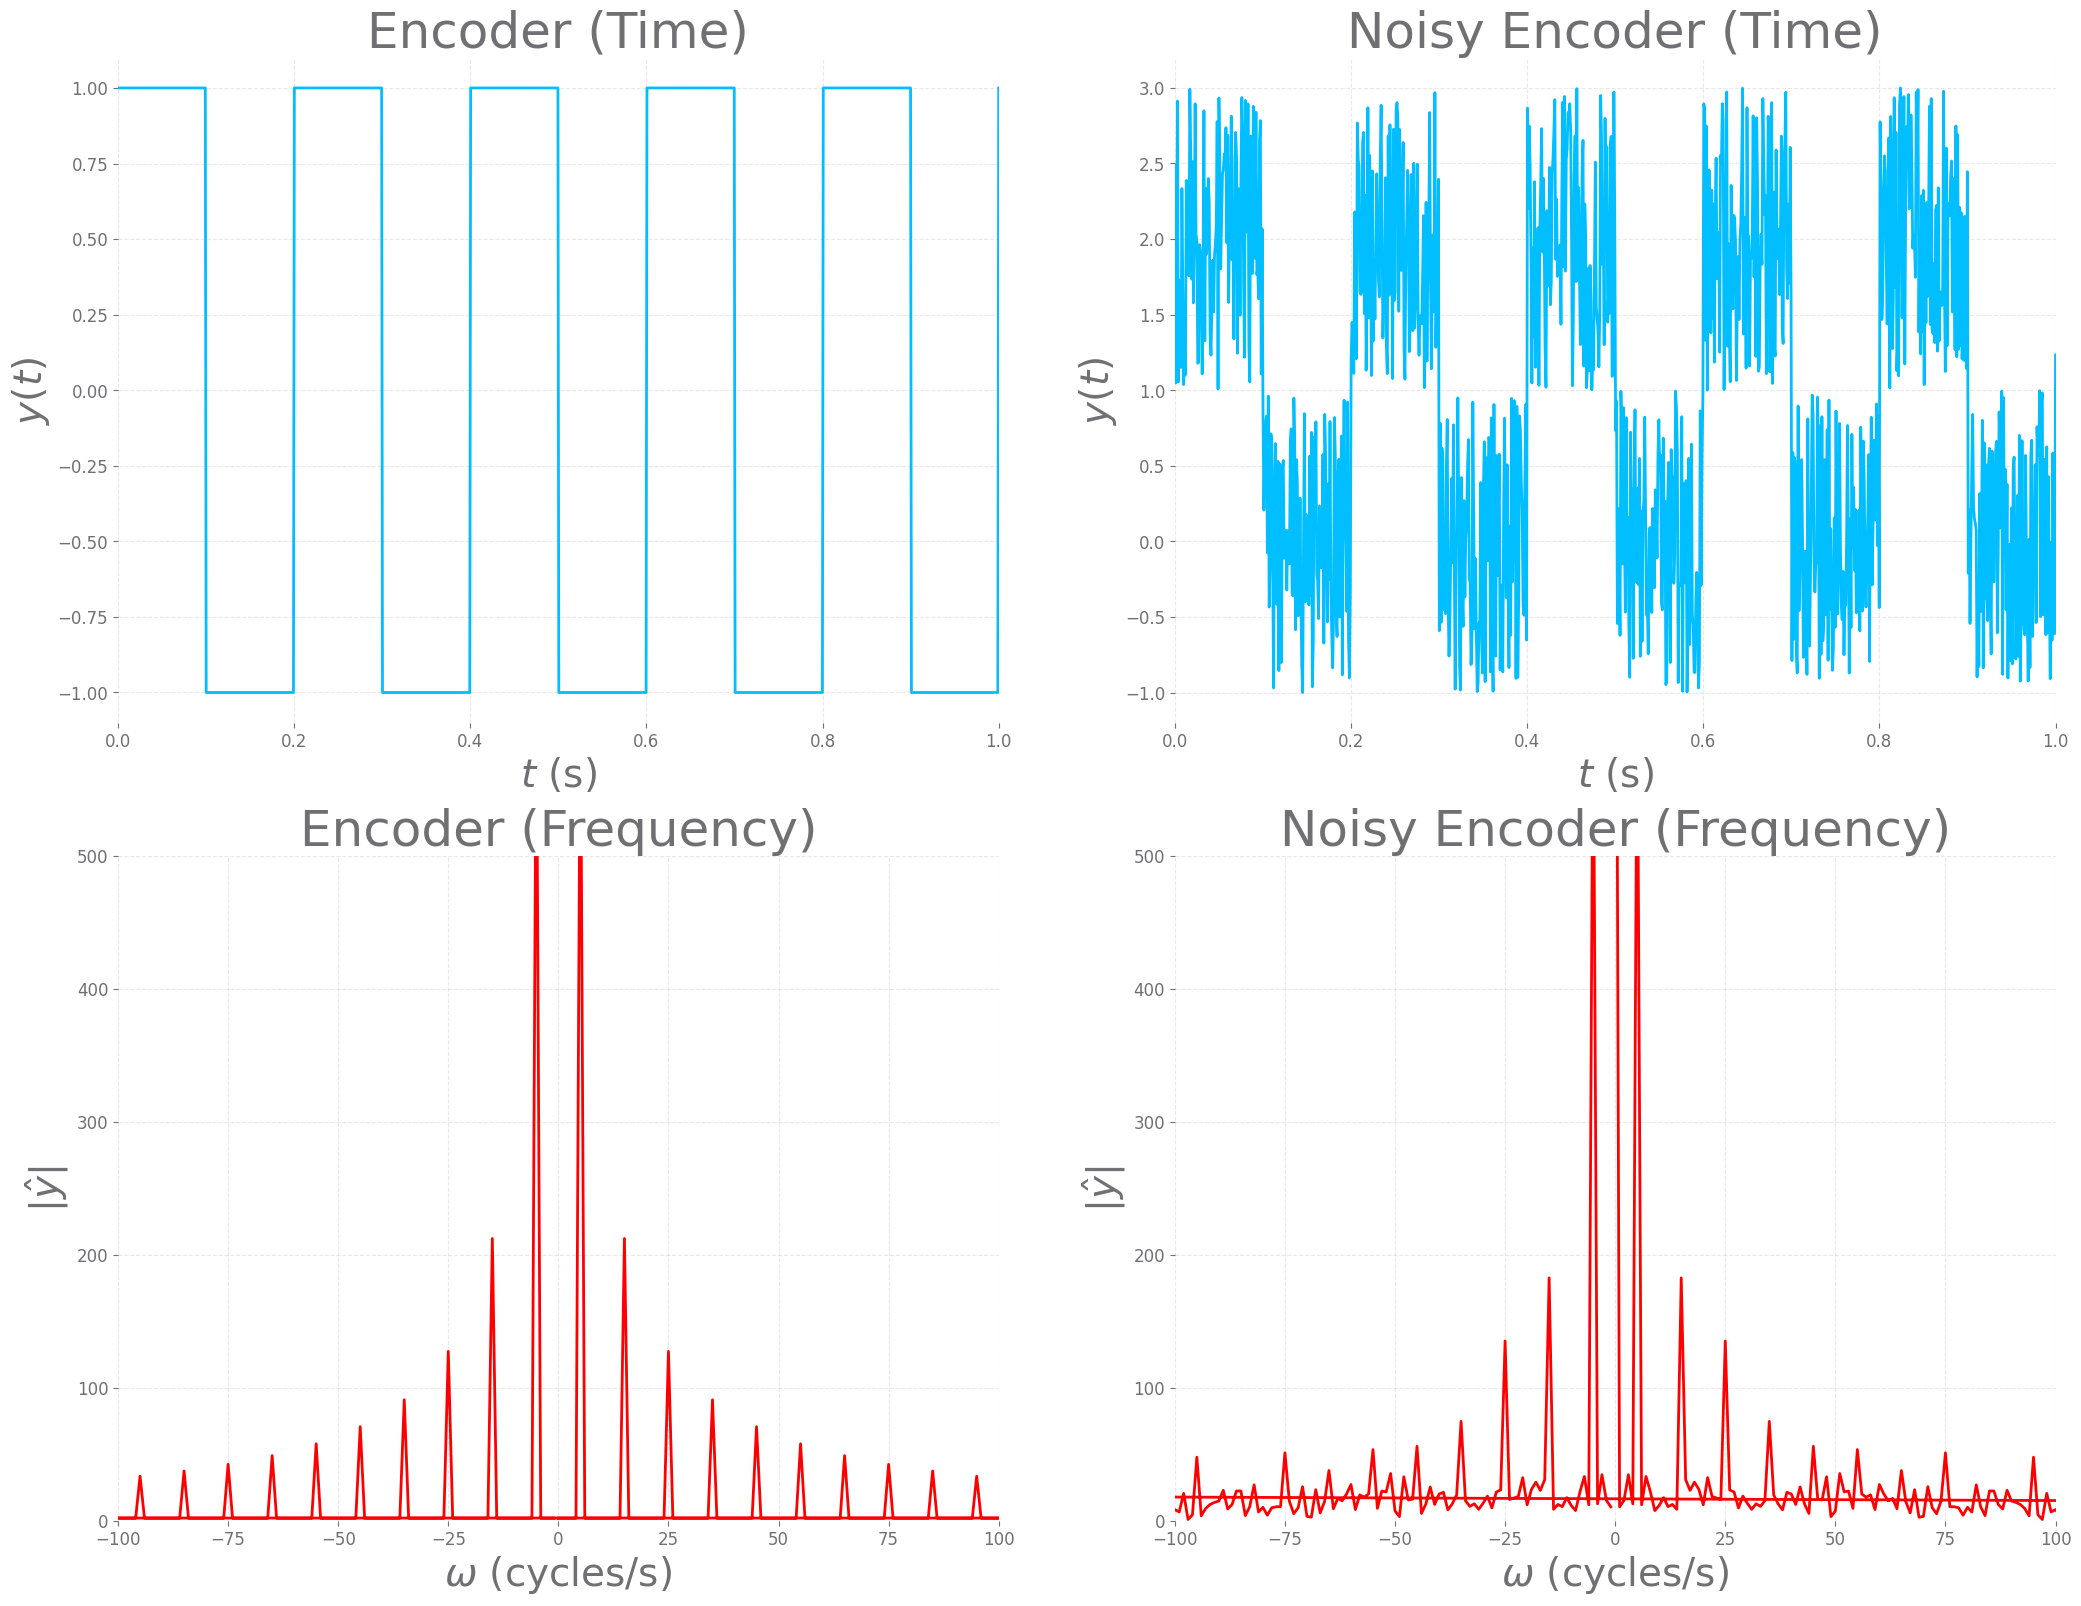

In [15]:
# Plot the signal
fig, ax = plt.subplots(2, 2, figsize=(25,19))

ax[0, 0].plot(t,y);
ax[0, 0].set_title("Encoder (Time)", fontsize=36)
ax[0, 0].set_ylabel("$y(t)$", fontsize=28 );
ax[0, 0].set_xlabel("$t$ (s)", fontsize=28);
ax[0, 0].set_xlim([min(t),max(t)]);

# Plot the power spectrum
ax[1, 0].plot(fcycles,np.absolute(yhat), color='red');
ax[1, 0].set_title("Encoder (Frequency)", fontsize=36)
ax[1, 0].set_xlim([-100,100]);
ax[1, 0].set_xlabel("$\omega$ (cycles/s)", fontsize=28);
ax[1, 0].set_ylabel("$|\hat{y}|$", fontsize=28);
ax[1, 0].set_ylim([0, 500])

ax[0, 1].plot(t,y_noisy);
ax[0, 1].set_title("Noisy Encoder (Time)", fontsize=36)
ax[0, 1].set_ylabel("$y(t)$", fontsize=28);
ax[0, 1].set_xlabel("$t$ (s)", fontsize=28);
ax[0, 1].set_xlim([min(t),max(t)]);

# Plot the power spectrum
ax[1, 1].plot(fcycles,np.absolute(yhat_noisy), color='red');
ax[1, 1].set_title("Noisy Encoder (Frequency)", fontsize=36)
ax[1, 1].set_xlim([-100,100]);
ax[1, 1].set_ylim([0, 500])
ax[1, 1].set_xlabel("$\omega$ (cycles/s)", fontsize=28);
ax[1, 1].set_ylabel("$|\hat{y}|$", fontsize=28);
fig.savefig("../assets/figs/encoder_signal.png")